### The University of Melbourne, School of Computing and Information Systems
# COMP90086 Computer Vision, 2021 Semester 2

## Assignment 1

**Student Name:**    `Tuohuang Li`

**Student ID:**     `1205166`

This iPython notebook is a template which you should use for your Assignment 1 submission. This file should be submitted at the **Assignment 1: Code** link on the LMS, along with any images needed to run your code.

In addition to this file, you should submit a writren report explaining your results at the **Assignment 1: Report** link on the LMS. Please see the assignment specification for details on what must be included in the report for each question.

*Adding proper comments to your code is MANDATORY.*

### 1. Mapping between world and image coordinates
Note: Writing code for this question is optional. However, if you do not include code here you *must* show your computation steps in your written report.

In [1]:
import cv2
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def display(img, *args, **kwargs):
    if len(img.shape) == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    else:
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    # Draw the image
    plt.imshow(img, *args, **kwargs)
    plt.axis('off')
    plt.show()

#Reference: 
#- The University of Melbourne, School of Computing and Information Systems
#- 17th Aug 2021
#- COMP90086 Week2 Tutorial
#- Computer program
#- https://canvas.lms.unimelb.edu.au/courses/117301/files/8669799?wrap=1

In [3]:
def load_img(file_name):
    rootpath='./'
    img = cv2.imread(os.path.join(rootpath, file_name))
    return img

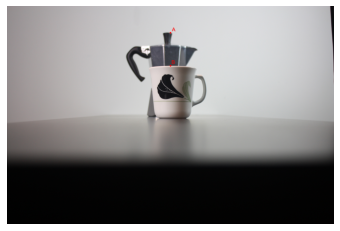

In [4]:
img = load_img("Asst1_1_image.jpg")
display(img)

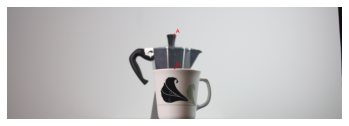

In [5]:
crop_1=img[0:500,:,:]
display(crop_1)

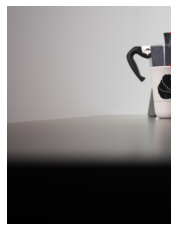

In [6]:
crop_2=img[:,0:750,:]
display(crop_2)

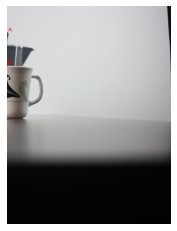

In [7]:
crop_3=img[:,750:1500,:]
display(crop_3)

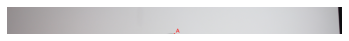

In [8]:
crop_4=img[0:122,:,:]
display(crop_4)

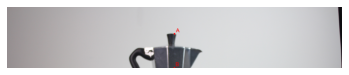

In [9]:
crop_5=img[0:274,:,:]
display(crop_5)

### 2. Secret messages with bandpass filters

## 2.1 Load cover image

In [10]:
cockatoo = load_img("cocky.jpg")

## 2.2 Check image properties 

In [11]:
type(cockatoo), cockatoo.shape, cockatoo.dtype

(numpy.ndarray, (600, 800, 3), dtype('uint8'))

## 2.3 Display cover image B

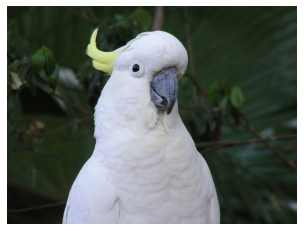

In [12]:
display(cockatoo)

## 2.3.1 Convert Image into grayscale

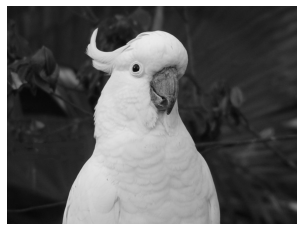

In [13]:
gray_cocky = cv2.cvtColor(cockatoo, cv2.COLOR_BGR2GRAY)
display(gray_cocky)

## 2.4 Crop Image into square size

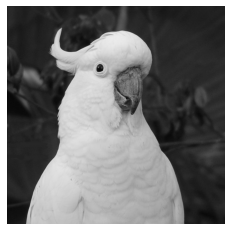

(600, 600)

In [14]:
cropped_cocky = gray_cocky[:, 100:700]
display(cropped_cocky)
cropped_cocky.shape

## 2.5 Create message image A

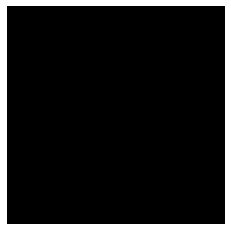

In [15]:
msg_image = np.zeros((600, 600, 3), np.uint8)
display(msg_image)

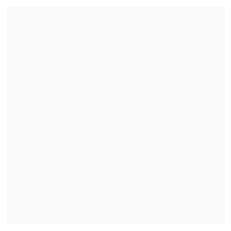

In [16]:
msg_image[:,:,:] = (250,250,250)
display(msg_image)

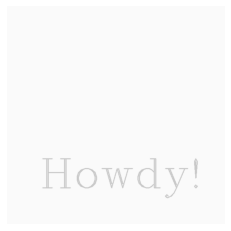

In [17]:
#org: location of the text
text = 'Howdy!'
org = (90,500)
font = cv2.FONT_HERSHEY_COMPLEX
fontScale = 3.8
color = (200,200,200)
thickness=2
# write the text on the input image
cv2.putText(msg_image, text, org, font, fontScale, color, thickness)
# display the image
display(msg_image)

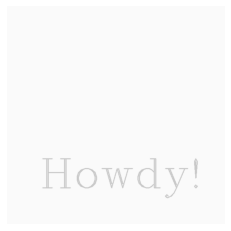

(600, 600)

In [18]:
msg_A = cv2.cvtColor(msg_image, cv2.COLOR_BGR2GRAY)
display(msg_A)
msg_A.shape

## 2.6 Apply high pass filter to message image A

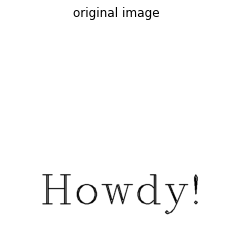

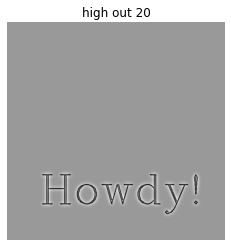

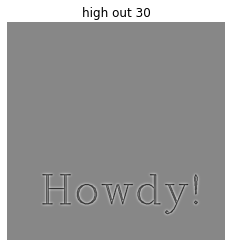

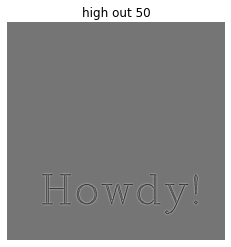

In [19]:
# spatial frequency thresholds
radius_high = [20, 30, 50]

# Fourier transform
f = np.fft.fft2(msg_A)
f = np.fft.fftshift(f)
 
def HighPass_filter(f,radius_high):        
    
    m = f.shape[0] 
    n = f.shape[1]
    mask = np.zeros((m, n))
    
    x0 = np.floor(m/2)
    y0 = np.floor(n/2)
    for i in range(m):
        for j in range(n):
            dis = np.sqrt((i - x0)**2 + (j - y0)**2)
            mask[i][j] = 1-np.exp((-1)*dis**2/2/(radius_high**2))
       
    result = np.multiply(f, mask) 
    return result

#list to store images applied filter
message_A = []

for i in range(len(radius_high)):
    f_high_filtered = HighPass_filter(f,radius_high[i])
    # Invert Fourier transform to get the filtered image
    img_high = np.real(np.fft.ifft2(np.fft.fftshift(f_high_filtered))) ##image low pass
    message_A.append(img_high)


plt.imshow(msg_A, cmap='gray')  
plt.title('original image')
plt.axis('off')
plt.show()

#plot 3 image with different radius thretholds
for i in range(len(message_A)): 
    plt.imshow(message_A[i], cmap='gray')  
    plt.title('high out ' + str(radius_high[i]))
    plt.axis('off')
    plt.show()

#Reference: 
#- The University of Melbourne, School of Computing and Information Systems
#- 17th Aug 2021
#- COMP90086 Week3 Tutorial
#- Computer program
#- https://canvas.lms.unimelb.edu.au/courses/117301/files/8703859?wrap=1

## 2.7 Apply Low pass filter to cover image B

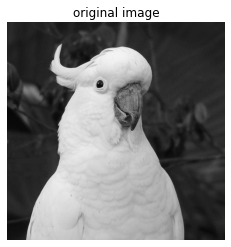

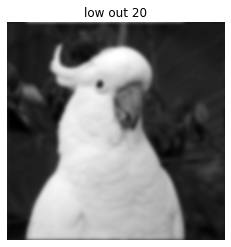

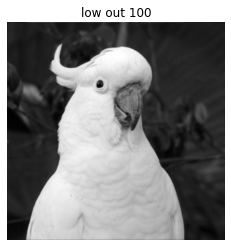

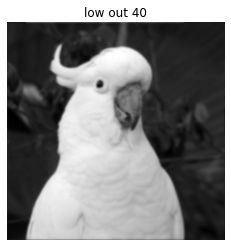

In [20]:
radius_low = [20, 100, 40]

# Fourier transform
f = np.fft.fft2(cropped_cocky)
f = np.fft.fftshift(f)


def LowPass_filter(f,radius_low):      
    
    m = f.shape[0]
    n = f.shape[1]
    mask = np.zeros((m, n))
  
    x0 = np.floor(m/2)
    y0 = np.floor(n/2)
    for i in range(m):
        for j in range(n):
            dis = np.sqrt((i - x0)**2 + (j - y0)**2)
            mask[i][j] = np.exp((-1)*dis**2/2/(radius_low**2))
        
    
    result = np.multiply(f, mask) 
    return result

#list to store images applied filter
cover_B = []

for i in range(len(radius_low)): 
    f_low_filtered = LowPass_filter(f,radius_low[i])
  # Invert Fourier transform to get the filtered image
    img_low = np.real(np.fft.ifft2(np.fft.fftshift(f_low_filtered))) ##image low pass
    cover_B.append(img_low)
    
#plot original image
plt.imshow(cropped_cocky ,cmap='gray')  
plt.title('original image')
plt.axis('off')
plt.show()

#plot 3 image with different radius thretholds
for i in range(len(cover_B)): 
    plt.imshow(cover_B[i] ,cmap='gray')  
    plt.title('low out ' + str(radius_low[i]))
    plt.axis('off')
    plt.show()

#Reference: 
#- The University of Melbourne, School of Computing and Information Systems
#- 17th Aug 2021
#- COMP90086 Week3 Tutorial
#- Computer program
#- https://canvas.lms.unimelb.edu.au/courses/117301/files/8703859?wrap=1

## 2.8 high pass filter, thresholds = 50; low pass filter, thresholds = 40 

In [21]:
blnd = []

for i in range(len(message_A)): 
    blnd.append(cv2.addWeighted(cover_B[i],0.8,message_A[i],0.2,0))
 

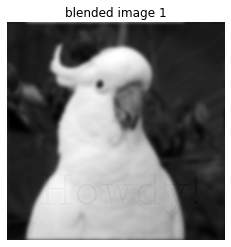

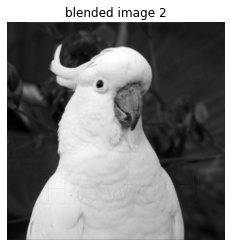

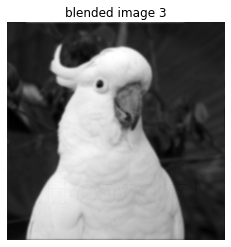

In [22]:
for i in range(len(blnd)):
    plt.imshow(blnd[i] , cmap='gray')  
    plt.title('blended image ' + str(i+1))
    plt.axis('off')
    plt.show()

## 2.9 Save blended image

In [23]:
for i in range(len(blnd)):
    cv2.imwrite('result'+str(i+1)+'.jpg', blnd[i]) 

## 3.0 Evaluation

In [28]:
from skimage import measure
def etp(im):
    e = skimage.measure.shannon_entropy(im)
    return e

## 3.1 Results comparation

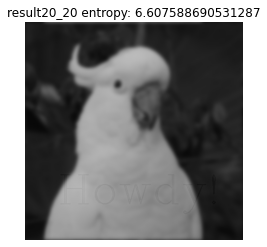

In [29]:
results20_20 = load_img('result1.jpg')

plt.figure()
plt.imshow(results20_20)
plt.axis('off')
plt.title('result20_20 entropy: '+str(etp(results20_20)))
plt.show()

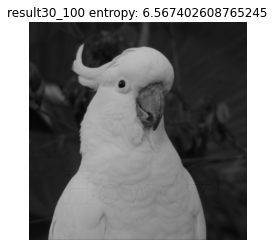

In [30]:
results30_100 = load_img('result2.jpg')

plt.figure()
plt.imshow(results30_100)
plt.axis('off')
plt.title('result30_100 entropy: '+str(etp(results30_100)))
plt.show()

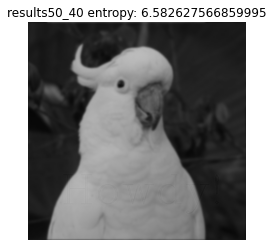

In [31]:
results50_40 = load_img('result3.jpg')

plt.figure()
plt.imshow(results50_40)
plt.axis('off')
plt.title('results50_40 entropy: '+str(etp(results50_40)))
plt.show()

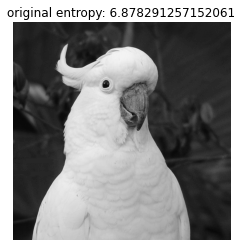

In [32]:
plt.figure()
plt.imshow(cropped_cocky,cmap='gray')
plt.axis('off')
plt.title('original entropy: '+str(etp(cropped_cocky)))
plt.show()